In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import bootcampviztools as bt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load data
df_balance= pd.read_csv("./data/us-balance-quarterly.csv", sep=";")
df_cashflow = pd.read_csv("./data/us-cashflow-quarterly.csv", sep=";")
df_income = pd.read_csv("./data/us-income-quarterly.csv", sep=";")

# Modify columns for identification
df_balance = df_balance.add_suffix('_balance')
df_cashflow = df_cashflow.add_suffix('_cashflow')
df_income = df_income.add_suffix('_income')

In [3]:
# Rename unique columns
df_balance.rename(columns={
    'SimFinId_balance': 'SimFinId',
    'Fiscal Year_balance': 'Fiscal Year',
    'Fiscal Period_balance': 'Fiscal Period',
    'Ticker_balance': 'Ticker',
    'Publish Date_balance': 'Publish Date'

}, inplace=True)

df_cashflow.rename(columns={
    'SimFinId_cashflow': 'SimFinId',
    'Fiscal Year_cashflow': 'Fiscal Year',
    'Fiscal Period_cashflow': 'Fiscal Period',
    'Ticker_cashflow': 'Ticker',
    'Publish Date_cashflow': 'Publish Date'

}, inplace=True)

df_income.rename(columns={
    'SimFinId_income': 'SimFinId',
    'Fiscal Year_income': 'Fiscal Year',
    'Fiscal Period_income': 'Fiscal Period',
    'Ticker_income': 'Ticker',
    'Publish Date_income': 'Publish Date'

}, inplace=True)

# Merge data sets 
merge_keys = ['SimFinId', 'Fiscal Year', 'Fiscal Period']

df_merged = df_balance.merge(df_cashflow, on=merge_keys, how='inner',suffixes=('_income', '_balance'))
df_merged = df_merged.merge(df_income, on=merge_keys, how='inner',suffixes=('', '_cashflow'))

In [4]:
print(df_merged.duplicated(subset=merge_keys).sum())

0


In [5]:
# Top 100 market cap Tickers
tickers = ['AAPL', 'MSFT', 'NVDA', 'AMZN', 'GOOGL', 'META', 'TSLA', 'AVGO', 'LLY', 'WMT', 
 'JPM', 'V', 'XOM', 'MA', 'UNH', 'PG', 'JNJ', 'HD', 'BAC', 'ABBV', 'KO', 'CRM', 
 'PEP', 'MRK', 'COST', 'ORCL', 'ADBE', 'CVX', 'ACN', 'MCD', 'TMO', 'NKE', 'TXN', 
 'ABT', 'LIN', 'DHR', 'WFC', 'AMD', 'INTC', 'AMGN', 'UPS', 'QCOM', 'NEE', 'CAT', 
 'PM', 'MS', 'UNP', 'GS', 'BA', 'SPGI', 'NOW', 'ELV', 'RTX', 'HON', 'BLK', 'LOW', 
 'INTU', 'LMT', 'ISRG', 'VRTX', 'AMT', 'PLD', 'SCHW', 'TJX', 'T', 'MDT', 'DE', 
 'CI', 'MU', 'REGN', 'CB', 'ADP', 'PGR', 'CSCO', 'GE', 'CL', 'GM', 'MO', 
 'F', 'SO', 'BDX', 'MMC', 'ADI', 'GILD', 'PANW', 'FI', 'USB', 'FDX', 'NSC', 'SLB', 
 'C', 'APD', 'HUM', 'WM', 'EQIX', 'RMD', 'TGT', 'LVS', 'BMY']

In [7]:
# Filter them out
df_filtered = df_merged[df_merged['Ticker'].isin(tickers)]
df_filtered

,Ticker_income,SimFinId,Currency_balance,Fiscal Year,Fiscal Period,Report Date_balance,Publish Date_income,Restated Date_balance,Shares (Basic)_balance,Shares (Diluted)_balance,...,Non-Operating Income (Loss)_income,"Interest Expense, Net_income","Pretax Income (Loss), Adj._income",Abnormal Gains (Losses)_income,Pretax Income (Loss)_income,"Income Tax (Expense) Benefit, Net_income",Income (Loss) from Continuing Operations_income,Net Extraordinary Gains (Losses)_income,Net Income_income,Net Income (Common)_income
136,AAPL,111052,USD,2019,Q3,2019-06-30,2019-07-31,2019-07-31,1.828253e+10,1.840552e+10,...,3.670000e+08,323475824.0,1.191100e+10,NaN,1.191100e+10,-1.867000e+09,10044000000,NaN,10044000000,10044000000
137,AAPL,111052,USD,2019,Q4,2019-09-30,2019-10-31,2020-10-30,1.796325e+10,1.808150e+10,...,5.020000e+08,296322145.0,1.612700e+10,NaN,1.612700e+10,-2.441000e+09,13686000000,NaN,13686000000,13686000000
138,AAPL,111052,USD,2020,Q1,2019-12-31,2020-01-29,2020-01-29,1.766016e+10,1.781842e+10,...,3.490000e+08,259779231.0,2.591800e+10,NaN,2.591800e+10,-3.682000e+09,22236000000,NaN,22236000000,22236000000
139,AAPL,111052,USD,2020,Q2,2020-03-31,2020-05-01,2020-05-01,1.744040e+10,1.761876e+10,...,2.820000e+08,292572937.0,1.313500e+10,NaN,1.313500e+10,-1.886000e+09,11249000000,NaN,11249000000,11249000000
140,AAPL,111052,USD,2020,Q3,2020-06-30,2020-07-31,2020-07-31,1.725029e+10,1.741915e+10,...,4.600000e+07,203572421.0,1.313700e+10,NaN,1.313700e+10,-1.884000e+09,11253000000,NaN,11253000000,11253000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54228,XOM,121214,USD,2023,Q1,2023-03-31,2023-05-02,2023-05-02,4.102000e+09,4.102000e+09,...,-4.999000e+09,-159000000.0,1.680300e+10,NaN,1.680300e+10,-4.960000e+09,11843000000,NaN,11430000000,11430000000
54229,XOM,121214,USD,2023,Q2,2023-06-30,2023-08-01,2023-08-01,4.061856e+09,4.066000e+09,...,-6.430000e+09,-249000000.0,1.165600e+10,NaN,1.165600e+10,-3.503000e+09,8153000000,NaN,7880000000,7880000000
54230,XOM,121214,USD,2023,Q3,2023-09-30,2023-10-31,2023-10-31,4.031111e+09,4.031111e+09,...,-6.424000e+09,-169000000.0,1.369900e+10,NaN,1.369900e+10,-4.353000e+09,9346000000,NaN,9070000000,9070000000
54231,XOM,121214,USD,2023,Q4,2023-12-31,2024-02-28,2025-02-19,4.013033e+09,4.013033e+09,...,-5.622000e+09,-272000000.0,1.062500e+10,NaN,1.062500e+10,-2.613000e+09,8012000000,NaN,7630000000,7630000000


In [8]:
# Creation of ratios for features
df_filtered = df_filtered.copy()
# 1. Liquidity Ratios:
# Current Ratio
df_filtered['Current_Ratio'] = df_filtered['Total Current Assets_balance'] / df_filtered['Total Current Liabilities_balance']

# 2. Profitability Ratios:
# Gross Profit Margin
df_filtered['Gross_Profit_Margin'] = df_filtered['Gross Profit_income'] / df_filtered['Revenue_income'] * 100

# Operating Profit Margin
df_filtered['Operating_Profit_Margin'] = df_filtered['Operating Income (Loss)_income'] / df_filtered['Revenue_income'] * 100

# Net Profit Margin
df_filtered['Net_Profit_Margin'] = df_filtered['Net Income_income'] / df_filtered['Revenue_income'] * 100

# Return on Assets (ROA)
df_filtered['ROA'] = df_filtered['Net Income_income'] / df_filtered['Total Assets_balance'] * 100

# Return on Equity (ROE)
df_filtered['ROE'] = df_filtered['Net Income_income'] / df_filtered['Total Equity_balance'] * 100

# 3. Leverage Ratios:
# Debt-to-Equity Ratio
df_filtered['Debt_to_Equity_Ratio'] = df_filtered['Total Liabilities_balance'] / df_filtered['Total Equity_balance']

# Debt Ratio
df_filtered['Debt_Ratio'] = df_filtered['Total Liabilities_balance'] / df_filtered['Total Assets_balance']

# 4. Efficiency Ratios
# Asset Turnover Ratio
df_filtered['Asset_Turnover_Ratio'] = df_filtered['Revenue_income'] / df_filtered['Total Assets_balance']

# 5. Market Ratios (requires market price data, not available in your dataset)
# Example for Earnings per Share (EPS)
df_filtered['EPS'] = df_filtered['Net Income_income'] / df_filtered['Shares (Basic)_income']

In [9]:
# Save them in one variable
ratios = ['Current_Ratio','Gross_Profit_Margin','Operating_Profit_Margin','Net_Profit_Margin','ROA','ROE','Debt_to_Equity_Ratio','Debt_Ratio','Asset_Turnover_Ratio','EPS']

In [10]:
df_filtered[['Current_Ratio', 'Gross_Profit_Margin','Operating_Profit_Margin', 'Net_Profit_Margin', 'ROA',\
             'ROE', 'Debt_to_Equity_Ratio', 'Debt_Ratio', 'Asset_Turnover_Ratio']].isna().sum().sort_values()

Current_Ratio              0
Gross_Profit_Margin        0
Operating_Profit_Margin    0
Net_Profit_Margin          0
ROA                        0
ROE                        0
Debt_to_Equity_Ratio       0
Debt_Ratio                 0
Asset_Turnover_Ratio       0
dtype: int64

In [11]:
# Realizar One-Hot Encoding en la columna 'Fiscal Period'
df_filtered = pd.get_dummies(df_filtered, columns=['Fiscal Period'], drop_first=True)
# df_filtered = pd.get_dummies(df_filtered, columns=['Fiscal Year'], drop_first=True)

In [12]:
df_filtered.isna().sum()[df_filtered.isna().sum() > 50]

Inventories_balance                                    355
Long Term Investments & Receivables_balance            883
Short Term Debt_balance                                149
Treasury Stock_balance                                 635
Change in Accounts Receivable_cashflow                1323
Change in Inventories_cashflow                        1406
Change in Accounts Payable_cashflow                   1392
Change in Other_cashflow                              1268
Net Change in Long Term Investment_cashflow            375
Net Cash from Acquisitions & Divestitures_cashflow     539
Dividends Paid_cashflow                                266
Cash from (Repayment of) Debt_cashflow                 121
Cash from (Repurchase of) Equity_cashflow              106
Selling, General & Administrative_income               112
Research & Development_income                          677
Depreciation & Amortization_income                     943
Abnormal Gains (Losses)_income                         7

In [13]:
# Elimino columnas
columns_to_remove_1 = df_filtered.isna().sum()[df_filtered.isna().sum() > 50].index.to_list()
df_filtered = df_filtered.drop(columns=columns_to_remove_1)

In [572]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 136 to 54232
Data columns (total 74 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Ticker_income                                            1562 non-null   object 
 1   SimFinId                                                 1562 non-null   int64  
 2   Currency_balance                                         1562 non-null   object 
 3   Fiscal Year                                              1562 non-null   int64  
 4   Report Date_balance                                      1562 non-null   object 
 5   Publish Date_income                                      1562 non-null   object 
 6   Restated Date_balance                                    1562 non-null   object 
 7   Shares (Basic)_balance                                   1559 non-null   float64
 8   Shares (Diluted)_balance      

In [14]:
columns_to_remove_2 = ['Ticker_income','SimFinId','Currency_balance','Report Date_balance','Publish Date_income','Restated Date_balance',\
                       'Ticker_balance','Currency_cashflow','Currency_income','Report Date_cashflow',\
                       'Publish Date_balance','Restated Date_cashflow','Report Date_income', 'Restated Date_income','Fiscal Year'] 
df_filtered = df_filtered.drop(columns=columns_to_remove_2)

In [24]:
import time

def calculate_eps(row):
    try:
        # Get ticker and publish date
        ticker = row['Ticker']
        pub_date = pd.to_datetime(row['Publish Date'])

        # Get the stock data from Yahoo Finance
        stock = yf.Ticker(ticker)

        # Access the 'info' attribute of the ticker, which contains fundamental data
        stock_info = stock.info

        # Check if EPS is available in the stock info and handle missing data
        if 'epsTrailingTwelveMonths' in stock_info:
            eps = stock_info['epsTrailingTwelveMonths']
        else:
            print(f"EPS data not found for {ticker}")
            return pd.NA  # Return NaN if EPS is not available

        # Add delay to avoid "Too Many Requests" error
        time.sleep(1)  # Wait for 1 second between requests

        return eps

    except Exception as e:
        print(f"Error fetching data for ticker {row['Ticker']}: {e}")
        return pd.NA  # Return NaN in case of error



In [25]:
# Apply the function to the DataFrame to get the EPS
df_filtered['EPS'] = df_filtered.progress_apply(lambda row: calculate_eps(row), axis=1)


100%|███████████████████████████████████████| 1562/1562 [31:56<00:00,  1.23s/it]


In [26]:
df_filtered.EPS.isna().sum()

np.int64(0)

In [28]:
df_filtered[['Ticker','EPS']]

,Ticker,EPS
136,AAPL,6.31
137,AAPL,6.31
138,AAPL,6.31
139,AAPL,6.31
140,AAPL,6.31
...,...,...
54228,XOM,7.84
54229,XOM,7.84
54230,XOM,7.84
54231,XOM,7.84


In [606]:
df_filtered.to_csv("./data/df_filtered.csv", index=False)

(2, 2)


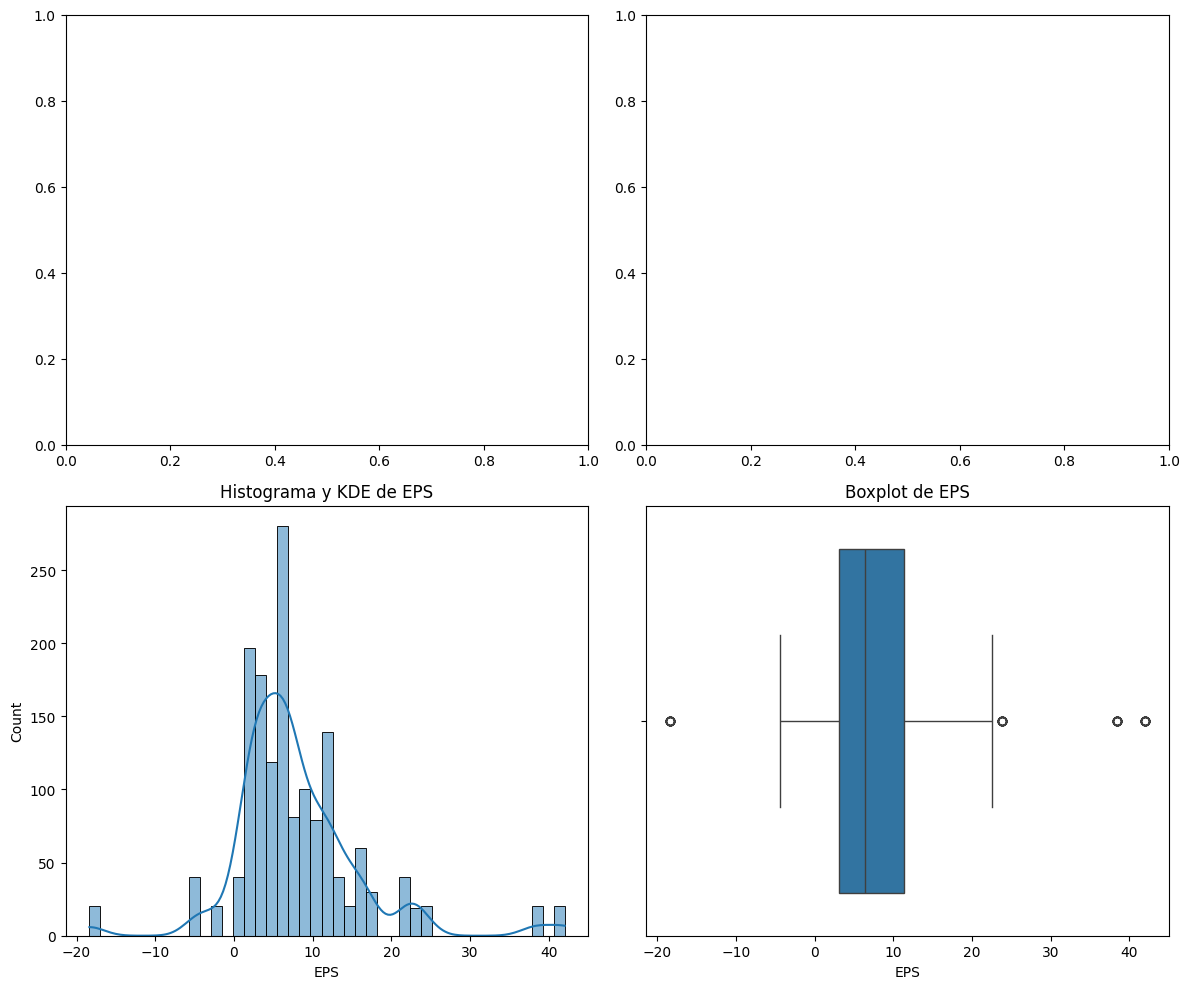

In [30]:
bt.plot_combined_graphs(df_filtered, ['Ticker','EPS'], whisker_width=1.5, bins = None)

In [32]:
# Scale balance columns in relation to total assets
balance_columns = [
    'Cash, Cash Equivalents & Short Term Investments_balance',
    'Accounts & Notes Receivable_balance',
    'Total Current Assets_balance',
    'Property, Plant & Equipment, Net_balance',
    'Other Long Term Assets_balance',
    'Total Noncurrent Assets_balance',
    'Total Current Liabilities_balance',
    'Long Term Debt_balance',
    'Total Noncurrent Liabilities_balance',
    'Total Liabilities_balance',
    'Total Equity_balance'
]

for col in balance_columns:
    df_filtered[f'{col}_scaled'] = df_filtered[col] / df_filtered['Total Assets_balance']

# Scale income columns in relation to net income
income_columns_net_income = [
    'Net Income_income', 
    'Operating Income (Loss)_income',
    'Interest Expense, Net_income',
    'Pretax Income (Loss), Adj._income',
    'Pretax Income (Loss)_income',
    'Income Tax (Expense) Benefit, Net_income',
    'Income (Loss) from Continuing Operations_income',
    'Gross Profit_income', 
    'Operating Expenses_income'
]

for col in income_columns_net_income:
    df_filtered[f'{col}_scaled'] = df_filtered[col] / df_filtered['Net Income_income']

# Scale income column in relation ro revenue
cashflow_columns_revenue = [
    'Shares (Basic)_cashflow',
    'Shares (Diluted)_cashflow',
    'Net Income/Starting Line_cashflow',
    'Depreciation & Amortization_cashflow',
    'Non-Cash Items_cashflow',
    'Change in Working Capital_cashflow',
    'Net Cash from Operating Activities_cashflow',
    'Change in Fixed Assets & Intangibles_cashflow',
    'Net Cash from Investing Activities_cashflow',
    'Net Cash from Financing Activities_cashflow',
    'Net Change in Cash_cashflow']                            

# Scale cashflow column in relation to revenue
for col in cashflow_columns_revenue:
    df_filtered[f'{col}_scaled'] = df_filtered[col] / df_filtered['Revenue_income']

In [33]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 136 to 54232
Data columns (total 90 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Shares (Basic)_balance                                          1559 non-null   float64
 1   Shares (Diluted)_balance                                        1559 non-null   float64
 2   Cash, Cash Equivalents & Short Term Investments_balance         1562 non-null   float64
 3   Accounts & Notes Receivable_balance                             1514 non-null   float64
 4   Total Current Assets_balance                                    1562 non-null   float64
 5   Property, Plant & Equipment, Net_balance                        1562 non-null   float64
 6   Other Long Term Assets_balance                                  1562 non-null   float64
 7   Total Noncurrent Assets_balance                      

In [34]:
non_scaled_variables = [col for col in df_filtered.columns if col.endswith('_cashflow') or col.endswith('_balance') or col.endswith('_income')]

In [35]:
df_filtered.isna().sum()

Shares (Basic)_balance                                      3
Shares (Diluted)_balance                                    3
Cash, Cash Equivalents & Short Term Investments_balance     0
Accounts & Notes Receivable_balance                        48
Total Current Assets_balance                                0
                                                           ..
Net Cash from Operating Activities_cashflow_scaled          0
Change in Fixed Assets & Intangibles_cashflow_scaled       15
Net Cash from Investing Activities_cashflow_scaled          0
Net Cash from Financing Activities_cashflow_scaled          0
Net Change in Cash_cashflow_scaled                          0
Length: 90, dtype: int64

In [36]:
df_filtered.fillna(0, inplace=True)

In [630]:
# Scalar ratios
scaler = StandardScaler()
df_filtered[ratios] = scaler.fit_transform(df_filtered[ratios])

In [631]:
# Scalar USD variables
usd_variables = [col for col in df_filtered.columns if col not in ratios and col not in ['Ticker', 'Fiscal Year_2020','Fiscal Year_2021',\
                                                                                         'Fiscal Year_2022', 'Fiscal Year_2023',\
                                                                                         'Fiscal Year_2024','Fiscal Year',\
                                                                                         'Fiscal Period_Q2','Fiscal Period_Q3',\
                                                                                         'Fiscal Period_Q4', 'target','Publish Date']]
df_filtered[usd_variables] = scaler.fit_transform(df_filtered[usd_variables])

In [37]:
df_filtered = df_filtered.drop(columns=non_scaled_variables)

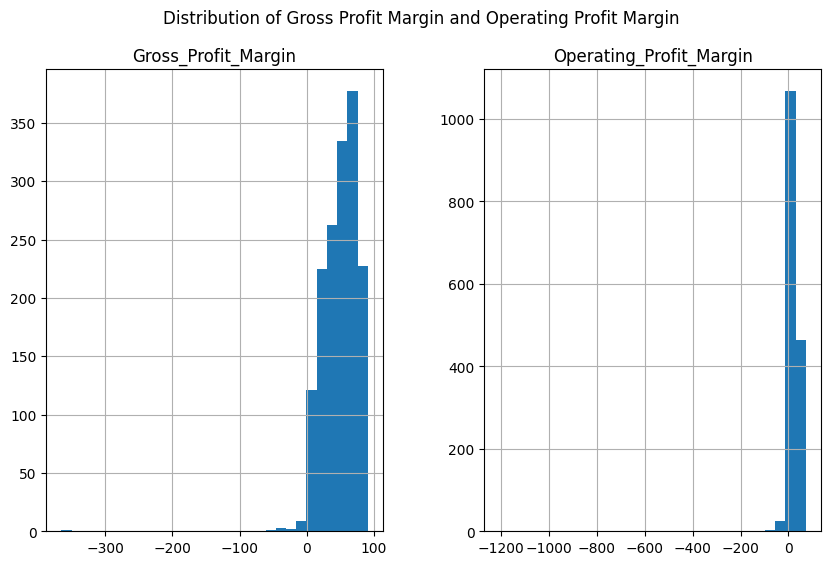

In [38]:
df_filtered[['Gross_Profit_Margin', 'Operating_Profit_Margin']].hist(bins=30, figsize=(10, 6))
plt.suptitle('Distribution of Gross Profit Margin and Operating Profit Margin')
plt.show()

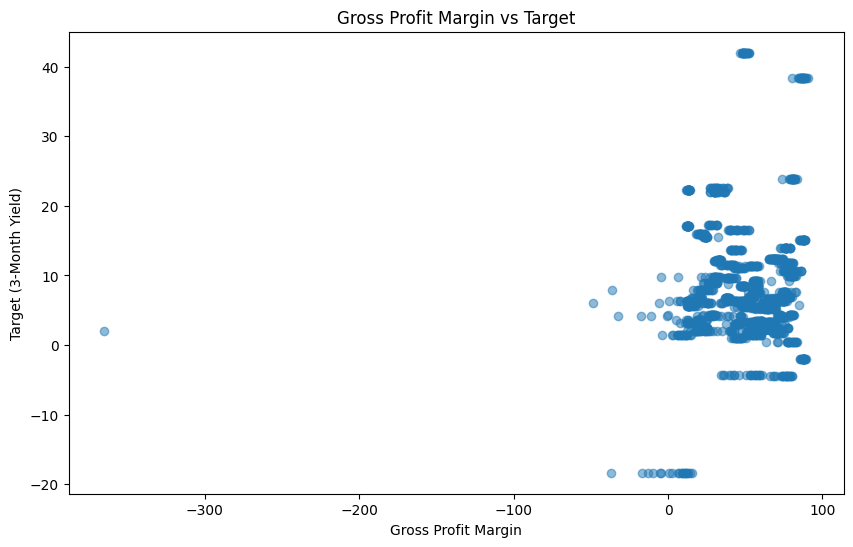

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(df_filtered['Gross_Profit_Margin'], df_filtered['EPS'], alpha=0.5)
plt.title('Gross Profit Margin vs Target')
plt.xlabel('Gross Profit Margin')
plt.ylabel('Target (3-Month Yield)')
plt.show()

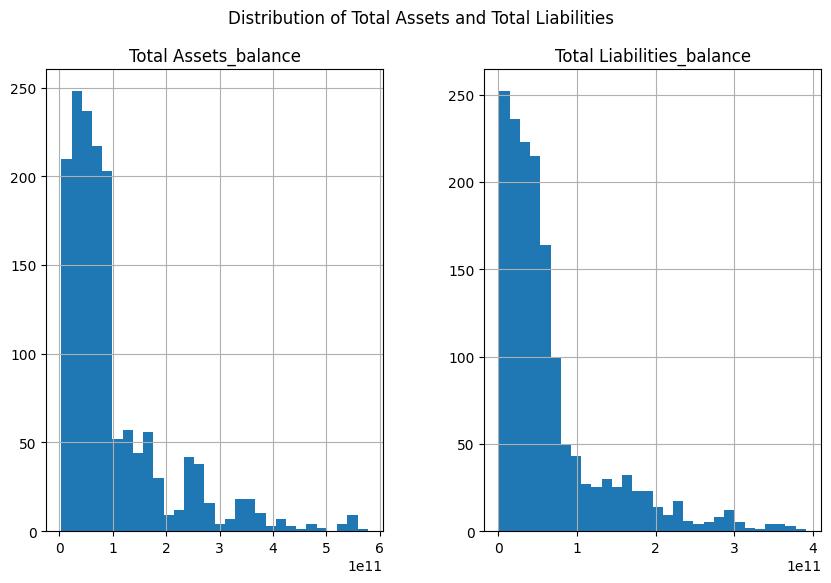

In [614]:
df_filtered[['Total Assets_balance', 'Total Liabilities_balance']].hist(bins=30, figsize=(10, 6))
plt.suptitle('Distribution of Total Assets and Total Liabilities')
plt.show()

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(df_filtered['Total Assets_balance'], df_filtered[''], alpha=0.5)
plt.title('Total Assets vs Target')
plt.xlabel('Total Assets')
plt.ylabel('Target (3-Month Yield)')
plt.show()

KeyError: 'Total Assets_balance'

<Figure size 1000x600 with 0 Axes>

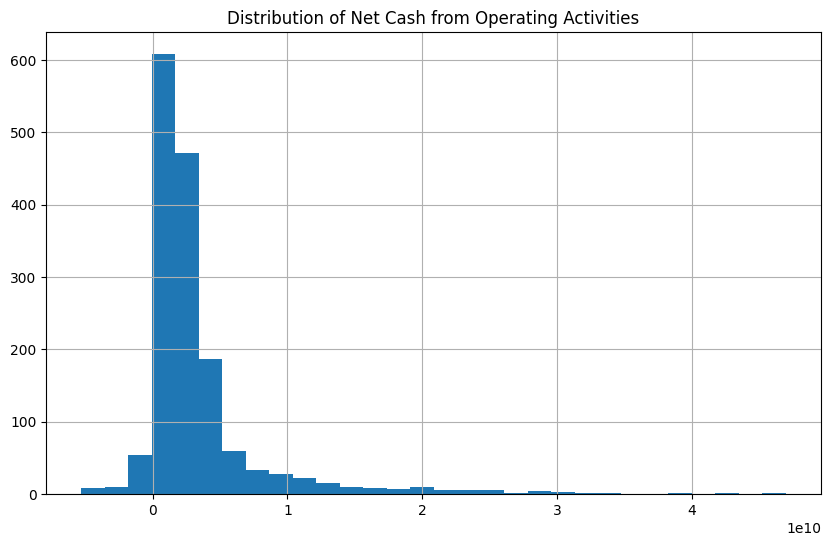

In [616]:
df_filtered['Net Cash from Operating Activities_cashflow'].hist(bins=30, figsize=(10, 6))
plt.title('Distribution of Net Cash from Operating Activities')
plt.show()

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(df_filtered['Net Cash from Operating Activities_cashflow'], df_filtered['EPS'], alpha=0.5)
plt.title('Net Cash from Operating Activities vs Target')
plt.xlabel('Net Cash from Operating Activities')
plt.ylabel('Target (3-Month Yield)')
plt.show()

KeyError: 'Net Cash from Operating Activities_cashflow'

<Figure size 1000x600 with 0 Axes>

In [42]:
df_filtered.select_dtypes(include=['object']).columns

Index(['Ticker', 'Publish Date'], dtype='object')

In [43]:
df_filtered = df_filtered.drop(columns=['Publish Date'])

In [452]:
# Ticker Encoder
# label_encoder = LabelEncoder()
# df_filtered['Ticker_encoded'] = label_encoder.fit_transform(df_filtered['Ticker'])

In [44]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 136 to 54232
Data columns (total 45 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Ticker                                                          1562 non-null   object 
 1   Current_Ratio                                                   1562 non-null   float64
 2   Gross_Profit_Margin                                             1562 non-null   float64
 3   Operating_Profit_Margin                                         1562 non-null   float64
 4   Net_Profit_Margin                                               1562 non-null   float64
 5   ROA                                                             1562 non-null   float64
 6   ROE                                                             1562 non-null   float64
 7   Debt_to_Equity_Ratio                                 

In [15]:
df_filtered.columns

Index(['Shares (Basic)_balance', 'Shares (Diluted)_balance',
       'Cash, Cash Equivalents & Short Term Investments_balance',
       'Accounts & Notes Receivable_balance', 'Total Current Assets_balance',
       'Property, Plant & Equipment, Net_balance',
       'Other Long Term Assets_balance', 'Total Noncurrent Assets_balance',
       'Total Assets_balance', 'Payables & Accruals_balance',
       'Total Current Liabilities_balance', 'Long Term Debt_balance',
       'Total Noncurrent Liabilities_balance', 'Total Liabilities_balance',
       'Share Capital & Additional Paid-In Capital_balance',
       'Retained Earnings_balance', 'Total Equity_balance',
       'Total Liabilities & Equity_balance', 'Shares (Basic)_cashflow',
       'Shares (Diluted)_cashflow', 'Net Income/Starting Line_cashflow',
       'Depreciation & Amortization_cashflow', 'Non-Cash Items_cashflow',
       'Change in Working Capital_cashflow',
       'Net Cash from Operating Activities_cashflow',
       'Change in Fix

In [46]:
ratios_target = ratios + ['EPS']

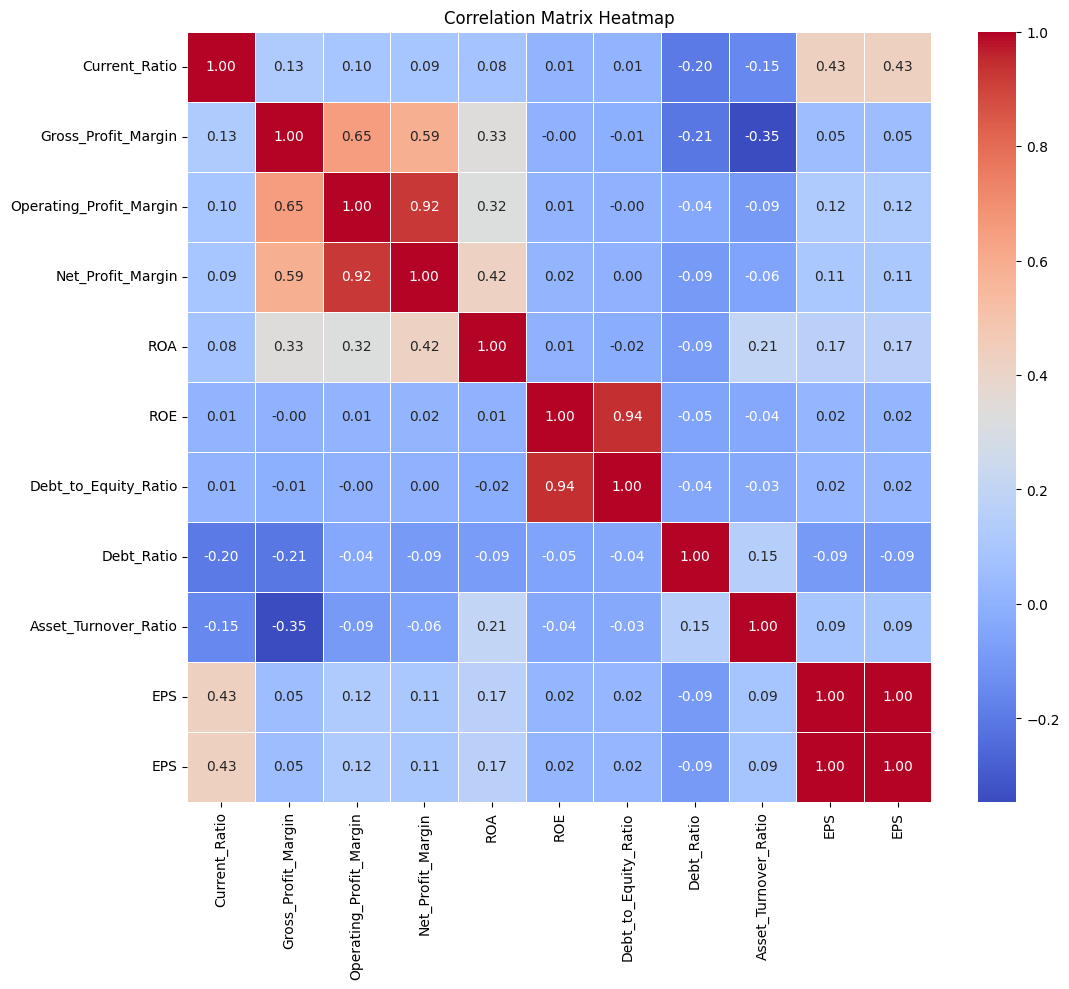

In [47]:
corr_matrix_ratios = df_filtered[ratios_target].corr(numeric_only = True)
plt.figure(figsize=(12, 10))  # Adjust the size to fit your data
sns.heatmap(corr_matrix_ratios, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Show the plot
plt.title("Correlation Matrix Heatmap")
plt.show()

In [49]:
# Split train - test

X = df_filtered.drop(['EPS','EPS','Ticker'], 
                     axis=1)
y = df_filtered['EPS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# RandomForestRegressor Model

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [51]:
y_pred = rf_model.predict(X_test)

In [52]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = mse ** 0.5

# R² 
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 1.7729542369159146
R²: 0.9572363635855676


In [641]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1562 entries, 136 to 54232
Data columns (total 35 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Ticker                                                          1562 non-null   object 
 1   Current_Ratio                                                   1562 non-null   float64
 2   Gross_Profit_Margin                                             1562 non-null   float64
 3   Operating_Profit_Margin                                         1562 non-null   float64
 4   Net_Profit_Margin                                               1562 non-null   float64
 5   ROA                                                             1562 non-null   float64
 6   ROE                                                             1562 non-null   float64
 7   Debt_to_Equity_Ratio                                 

In [53]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Instanciar GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Imprimir el mejor conjunto de hiperparámetros
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [467]:
best_params = grid_search.best_params_

rf_model = RandomForestRegressor(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test)


In [468]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = mse ** 0.5

# R² 
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 0.12882049527871603
R²: 0.06534971020588276


In [ ]:
# Random Forest is not a good model

In [469]:
# XGBoost
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

In [471]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calcular RMSE (Root Mean Squared Error) manualmente
rmse = mse ** 0.5

# Calcular R² (Coeficiente de Determinación)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 0.1327293401186994
R²: 0.007768326292956984


In [472]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_child_weight': [1, 3, 5]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', verbose=1)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print(f"Best parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200}


In [473]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo con los mejores parámetros
xgb_model = xgb.XGBRegressor(
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=5,
    n_estimators=200,
    random_state=42
)


In [474]:
# Entrenar el modelo
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [475]:
# Hacer predicciones
y_pred = xgb_model.predict(X_test)


In [477]:
# Calcular MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calcular RMSE (Root Mean Squared Error) manualmente
rmse = mse ** 0.5

# Calcular R² (Coeficiente de Determinación)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 0.12708613273023348
R²: 0.09034744389450666


In [478]:
import lightgbm as lgb


lgb_model = lgb.LGBMRegressor(
    n_estimators=100,        # Número de árboles
    learning_rate=0.1,       # Tasa de aprendizaje
    max_depth=10,            # Profundidad máxima de los árboles
    random_state=42          # Para reproducibilidad
)


# Entrenar el modelo
lgb_model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = lgb_model.predict(X_test)


[LightGBM] [Fatal] Do not support special JSON characters in feature name.


LightGBMError: Do not support special JSON characters in feature name.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)

In [ ]:
import pandas as pd
import yfinance as yf
from tqdm import tqdm

tqdm.pandas()

def calculate_past_return(row, months=1):
    try:
        ticker = row['Ticker']
        pub_date = pd.to_datetime(row['Publish Date'])
        
        # Download historical data for the specified period
        start_date = (pub_date - pd.DateOffset(months=months)).strftime('%Y-%m-%d')
        end_date = pub_date.strftime('%Y-%m-%d')
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        if data.empty:
            return pd.NA
        
        data.index = pd.to_datetime(data.index)
        
        # Get the last trading day on or before the publish date
        valid_days = data.index[data.index <= pub_date]
        if len(valid_days) == 0:
            return pd.NA
        price_pub = data.loc[valid_days[-1], 'Close']
        
        # Get the first trading day on or after the reference date
        ref_date = pub_date - pd.DateOffset(months=months)
        ref_days = data.index[data.index >= ref_date]
        if len(ref_days) == 0:
            return pd.NA
        price_ref = data.loc[ref_days[0], 'Close']
        
        # Calculate and return the return as a float
        result = (price_pub / price_ref) - 1
        return float(result)
    
    except Exception as e:
        return pd.NA

# Calculate returns for different periods by specifying the 'months' parameter.
df_filtered['past_1m_return'] = df_filtered.progress_apply(lambda row: calculate_past_return(row, months=1), axis=1)
df_filtered['past_3m_return'] = df_filtered.progress_apply(lambda row: calculate_past_return(row, months=3), axis=1)
df_filtered['past_6m_return'] = df_filtered.progress_apply(lambda row: calculate_past_return(row, months=6), axis=1)

print(f"Calculated past 1-month returns for {df_filtered['past_1m_return'].notna().sum()} rows successfully.")
print(f"Calculated past 3-month returns for {df_filtered['past_3m_return'].notna().sum()} rows successfully.")
print(f"Calculated past 6-month returns for {df_filtered['past_6m_return'].notna().sum()} rows successfully.")
